In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 확인

In [ ]:
dataset_path = "../data/Mental_Health_Lifestyle_Dataset.csv"
df = pd.read_csv(dataset_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2405 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB


In [20]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

print("수치형:", numeric_cols)
print("범주형:", categorical_cols)

# 요약 정보 만들기
num_summary = pd.DataFrame([
    {
        "Column": col,
        "Min": df[col].min(),
        "Max": df[col].max(),
        "Median": round(df[col].median(), 2),
        "Std": round(df[col].std(), 2)
    }
    for col in numeric_cols
])

# 출력
print("수치형 변수 요약:")
print(num_summary)

cat_values = {col: df[col].unique().tolist() for col in categorical_cols}
cat_df = pd.DataFrame([
    {"Column": col, "Unique Values": values}
    for col, values in cat_values.items()
])
print("범주형 value 목록:")
print(cat_df)

수치형: ['Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']
범주형: ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level', 'Mental Health Condition']
수치형 변수 요약:
                        Column   Min   Max  Median    Std
0                          Age  18.0  64.0    41.0  13.43
1                  Sleep Hours   1.4  11.3     6.5   1.50
2          Work Hours per Week  20.0  59.0    39.0  11.45
3  Screen Time per Day (Hours)   2.0   8.0     5.1   1.75
4     Social Interaction Score   1.0  10.0     5.5   2.56
5              Happiness Score   1.0  10.0     5.4   2.56
범주형 value 목록:
                    Column                                      Unique Values
0                  Country  [Brazil, Australia, Japan, Germany, India, Can...
1                   Gender                              [Male, Female, Other]
2           Exercise Level                              [Low, Moderate, High]
3                Diet Type 

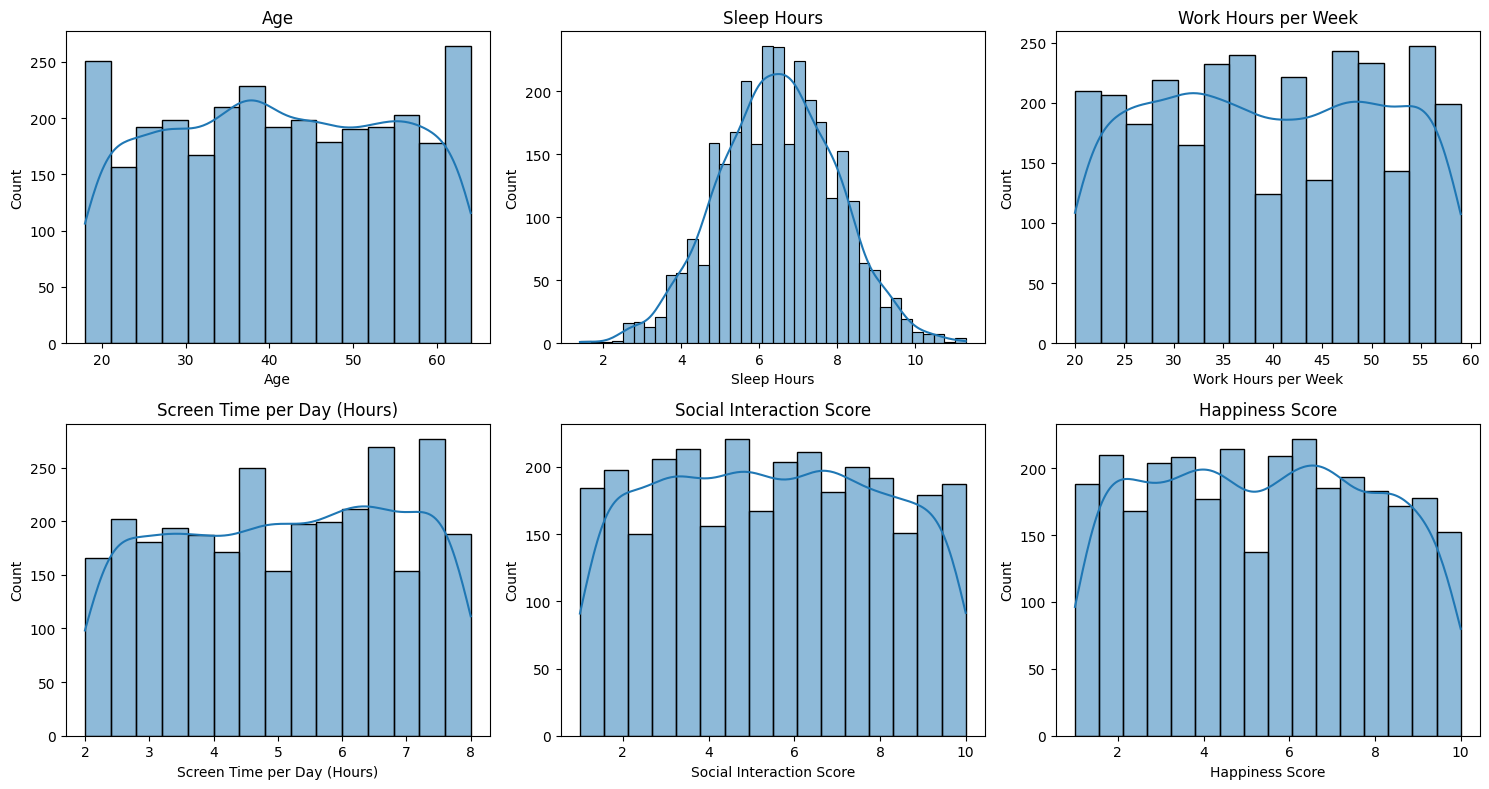

In [21]:
# numeric 변수 분포 확인 => Sleep Hours만 정규분포 모양
cols = 3
rows = 2

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()


# 전처리

### 방법1) 루틴변수 + 타겟변수만 전처리 (기본 전처리 방법!)

* **루틴 변수+타겟 변수**만 전처리한 코드.
* 전처리 결과 파일의 이름은 **"processed_routine_dataset2.csv"**

---

[전처리 방법]

numerical 변수 -> 정규분포: standard 정규화/ 그외: minmax 정규화

ordinal 변수 -> labeling

nominal 변수 -> one-hot encoding

[사용한 변수 목록] - 루틴변수 + 타겟변수 사용

numerical : 정규분포- Sleep Hours/ 그외- Screen Time per Day (Hours), Social Interection Score, Happiness Score

ordinal : Exercise Level

nominal : Diet Type



In [ ]:
# 1. 데이터 불러오기
df = pd.read_csv(dataset_path, keep_default_na=False)

# 2. 수치형 컬럼 정하기
numeric_std_cols = ['Sleep Hours']
numeric_minmax_cols = ['Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']

# 3. 정규화 (MinMaxScaler)
scaler1 = StandardScaler()
df[numeric_std_cols] = scaler1.fit_transform(df[numeric_std_cols])
scaler2 = MinMaxScaler()
df[numeric_minmax_cols] = scaler2.fit_transform(df[numeric_minmax_cols])

# 4. 범주형 변수 분리
# 4-1. Ordinal 변수 -> Label Encoding
ordinal_map = {
    'Exercise Level': {'Low': 1, 'Moderate': 2, 'High': 3}
}
for col, mapping in ordinal_map.items():
    df[col] = df[col].map(mapping)

# 4-2. Nominal 변수 -> One-Hot Encoding
nominal_cols = ['Diet Type']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)

# 5. csv로 결과 저장
df.to_csv("../results/processed_routine_dataset2.csv", index=False)

# 6. 결과 확인
df

,Country,Age,Gender,Exercise Level,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Diet Type_Junk Food,Diet Type_Keto,Diet Type_Vegan,Diet Type_Vegetarian
0,Brazil,48,Male,1,-0.117319,Low,None,21,0.333333,0.755556,0.611111,0,0,0,1
1,Australia,31,Male,2,-1.050891,Low,PTSD,48,0.533333,0.800000,0.644444,0,0,1,0
2,Japan,37,Female,1,0.482835,High,None,43,0.450000,0.955556,0.966667,0,0,0,1
3,Brazil,35,Male,1,0.482835,Low,Depression,43,0.033333,0.800000,0.622222,0,0,1,0
4,Germany,46,Male,1,0.549519,Low,Anxiety,35,0.266667,0.411111,0.377778,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,2,0.349467,High,Depression,29,0.400000,0.966667,0.544444,0,0,0,0
2996,Australia,27,Male,1,0.416151,Low,None,47,0.900000,0.588889,0.988889,1,0,0,0
2997,Australia,42,Male,2,-0.317370,High,Depression,23,0.316667,0.466667,0.344444,0,0,0,0
2998,Australia,25,Male,3,-0.517421,Low,Anxiety,51,0.383333,0.544444,0.344444,0,1,0,0


### 방법2) 모든 변수 전처리

* 회의 결과 루틴 변수만 전처리 하는것으로 알고 있긴 했는데, 혹시 사용할까 싶어 **모든 변수** 전처리한 코드도 작성함.
* 전처리 결과 파일의 이름은 **"processed_all_dataset2.csv"**

---

[전처리 방법]

numerical 변수 -> 정규분포: standard 정규화/ 그외: minmax 정규화

ordinal 변수 -> labeling

nominal 변수 -> one-hot encoding

[사용한 변수 목록] - 모든 변수 사용

numerical : 정규분포- Sleep Hours/ 그외- Age, Work Hours per Week, Screen Time per Day (Hours), Social Interection Score, Happiness Score

ordinal : Exercise Level, Stress Level

nominal : Country, Gender, Diet Type, Mental Health Condition


In [ ]:
# 1. 데이터 불러오기
df = pd.read_csv(dataset_path, keep_default_na=False)

# 2. 수치형 컬럼 정하기
numeric_std_cols = ['Sleep Hours']
numeric_minmax_cols = ['Age', 'Work Hours per Week', 'Screen Time per Day (Hours)',
                       'Social Interaction Score', 'Happiness Score']

# 3. 정규화 (MinMaxScaler)
scaler1 = StandardScaler()
df[numeric_std_cols] = scaler1.fit_transform(df[numeric_std_cols])
scaler2 = MinMaxScaler()
df[numeric_minmax_cols] = scaler2.fit_transform(df[numeric_minmax_cols])

# 4. 범주형 변수 분리
ordinal_map = {
    'Exercise Level': {'Low': 1, 'Moderate': 2, 'High': 3},
    'Stress Level': {'Low': 1, 'Moderate': 2, 'High': 3}
}
for col, mapping in ordinal_map.items():
    df[col] = df[col].map(mapping)

# Nominal 변수 → One-Hot Encoding
nominal_cols = ['Country', 'Gender', 'Diet Type', 'Mental Health Condition']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)

# 5. csv로 결과 저장
df.to_csv("../results/processed_all_dataset2.csv", index=False)

# 6. 결과 확인
df

,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Country_Brazil,Country_Canada,...,Gender_Male,Gender_Other,Diet Type_Junk Food,Diet Type_Keto,Diet Type_Vegan,Diet Type_Vegetarian,Mental Health Condition_Bipolar,Mental Health Condition_Depression,Mental Health Condition_None,Mental Health Condition_PTSD
0,0.652174,1,-0.117319,1,0.025641,0.333333,0.755556,0.611111,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0.282609,2,-1.050891,1,0.717949,0.533333,0.800000,0.644444,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0.413043,1,0.482835,3,0.589744,0.450000,0.955556,0.966667,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0.369565,1,0.482835,1,0.589744,0.033333,0.800000,0.622222,1,0,...,1,0,0,0,1,0,0,1,0,0
4,0.608696,1,0.549519,1,0.384615,0.266667,0.411111,0.377778,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.847826,2,0.349467,3,0.230769,0.400000,0.966667,0.544444,0,0,...,0,0,0,0,0,0,0,1,0,0
2996,0.195652,1,0.416151,1,0.692308,0.900000,0.588889,0.988889,0,0,...,1,0,1,0,0,0,0,0,1,0
2997,0.521739,2,-0.317370,3,0.076923,0.316667,0.466667,0.344444,0,0,...,1,0,0,0,0,0,0,1,0,0
2998,0.152174,3,-0.517421,1,0.794872,0.383333,0.544444,0.344444,0,0,...,1,0,0,1,0,0,0,0,0,0


# (부록) 트리 모델링 후 머신러닝 (그냥지피티시켜서해봤는데망함 안봐도됩니다.. 지울 예정)


In [ ]:
df = pd.read_csv(dataset_path)

# 1. 'Happiness Score'을 타겟으로
y = df["Happiness Score"]

# 2. 문자열 범주형 변수는 Label Encoding만 수행
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
for col in df_copy.select_dtypes(include="object").columns:
    df_copy[col] = LabelEncoder().fit_transform(df_copy[col])

# 3. 나머지는 그대로 쓰기
X = df_copy.drop("Happiness Score", axis=1)

# 4. 트리 모델 학습
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

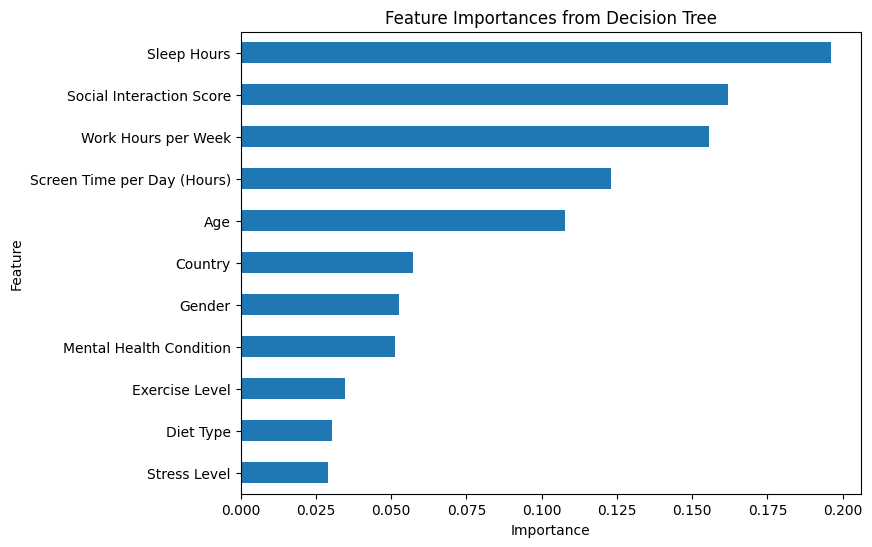

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 변수 중요도 추출
importances = pd.Series(tree.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=True)

# 시각화
plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title("Feature Importances from Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = tree.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2.5434072975164965
MSE: 9.771060645814906
R2 Score: -0.443427907399389


📊 앙상블 모델 성능 비교:
               Model     MAE     MSE  R2 Score
0      Decision Tree  0.2533  0.0875   -0.0475
1      Random Forest  0.2517  0.0852   -0.0190
2  Gradient Boosting  0.2517  0.0847   -0.0141


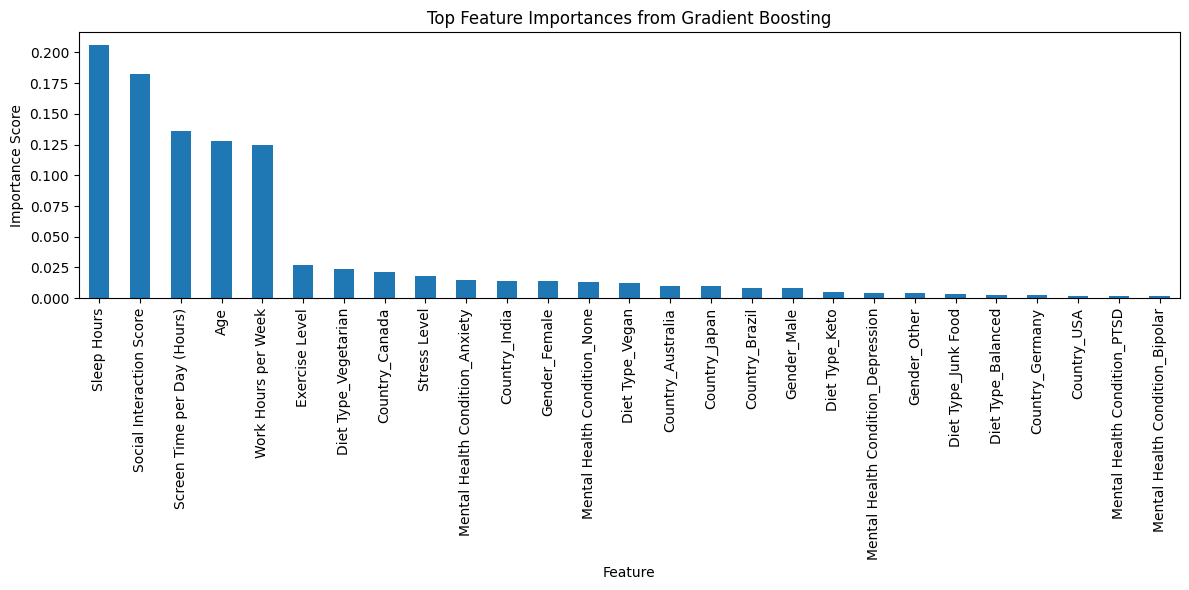

In [ ]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 (None이 NaN으로 처리되지 않도록!)
df = pd.read_csv(dataset_path, keep_default_na=False)

# 2. 수치형 컬럼 정규화 (MinMax)
numeric_cols = ['Sleep Hours', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 3. Ordinal 변수 Label Encoding
ordinal_map = {
    'Exercise Level': {'Low': 1, 'Moderate': 2, 'High': 3},
    'Stress Level': {'Low': 1, 'Moderate': 2, 'High': 3}
}
for col, mapping in ordinal_map.items():
    df[col] = df[col].map(mapping)

# 4. Nominal 변수 One-Hot Encoding (0/1로!)
nominal_cols = ['Diet Type', 'Country', 'Gender', 'Mental Health Condition']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=False, dtype=int)

# 5. 타겟 & 특성 분리
y = df["Happiness Score"]
X = df.drop("Happiness Score", axis=1)

# 6. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. 모델 정의
models = {
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 8. 모델 훈련 및 성능 평가
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "R2 Score": round(r2, 4)
    })

# 9. 성능 비교 출력
results_df = pd.DataFrame(results)
print("📊 앙상블 모델 성능 비교:")
print(results_df)

# 10. 가장 성능 좋은 모델의 feature importance 시각화 (예: Gradient Boosting 기준)
best_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
best_model.fit(X_train, y_train)

importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
importances.plot(kind='bar')
plt.title("Top Feature Importances from Gradient Boosting")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


📊 분류 모델 성능 비교:
               Model  Accuracy  F1 Score
0      Decision Tree    0.3283    0.3065
1      Random Forest    0.3300    0.3294
2  Gradient Boosting    0.3283    0.3267

📄 Gradient Boosting Classification Report:
              precision    recall  f1-score   support

        High       0.32      0.26      0.29       191
         Low       0.34      0.35      0.35       202
      Medium       0.32      0.37      0.34       207

    accuracy                           0.33       600
   macro avg       0.33      0.33      0.33       600
weighted avg       0.33      0.33      0.33       600



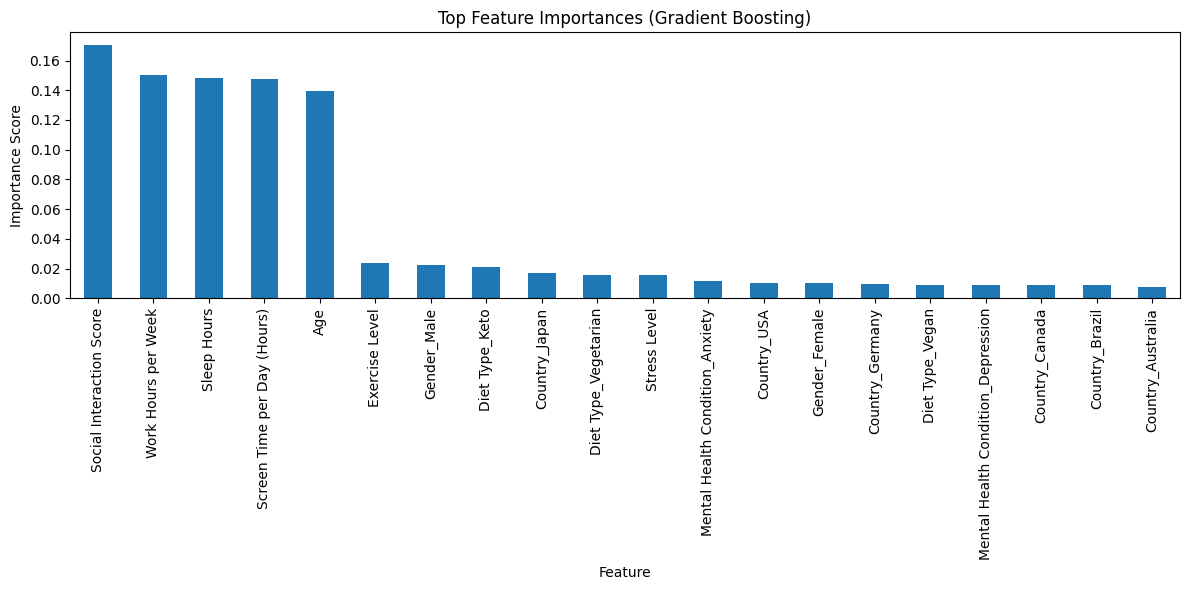

In [ ]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 (None이 NaN으로 처리되지 않도록!)
df = pd.read_csv(dataset_path, keep_default_na=False)

# 2. 수치형 변수 정규화 (MinMax)
numeric_cols = ['Sleep Hours', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 3. Ordinal 변수 Label Encoding
ordinal_map = {
    'Exercise Level': {'Low': 1, 'Moderate': 2, 'High': 3},
    'Stress Level': {'Low': 1, 'Moderate': 2, 'High': 3}
}
for col, mapping in ordinal_map.items():
    df[col] = df[col].map(mapping)

# # 4. Nominal 변수 One-Hot Encoding (0/1로 변환)
# nominal_cols = ['Diet Type', 'Country', 'Gender', 'Mental Health Condition']
# df = pd.get_dummies(df, columns=nominal_cols, drop_first=False, dtype=int)

# 5. 🎯 타겟: Happiness Level 생성 (Low, Medium, High)
df['Happiness Level'] = pd.cut(
    df['Happiness Score'],
    bins=[-1, 0.33, 0.66, 2],
    labels=['Low', 'Medium', 'High']
)

# 6. 특성과 타겟 분리
X = df.drop(columns=['Happiness Score', 'Happiness Level'])
y = df['Happiness Level']

# 7. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. 모델 정의
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 9. 모델 학습 및 평가
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1 Score": round(f1, 4)
    })

# 10. 성능 비교 출력
results_df = pd.DataFrame(results)
print("📊 분류 모델 성능 비교:")
print(results_df)

# 11. 상세 보고서 (Gradient Boosting 기준)
print("\n📄 Gradient Boosting Classification Report:")
print(classification_report(y_test, models["Gradient Boosting"].predict(X_test)))

# 12. Gradient Boosting의 Feature Importance 시각화
importances = pd.Series(models["Gradient Boosting"].feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
importances.head(20).plot(kind='bar')
plt.title("Top Feature Importances (Gradient Boosting)")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


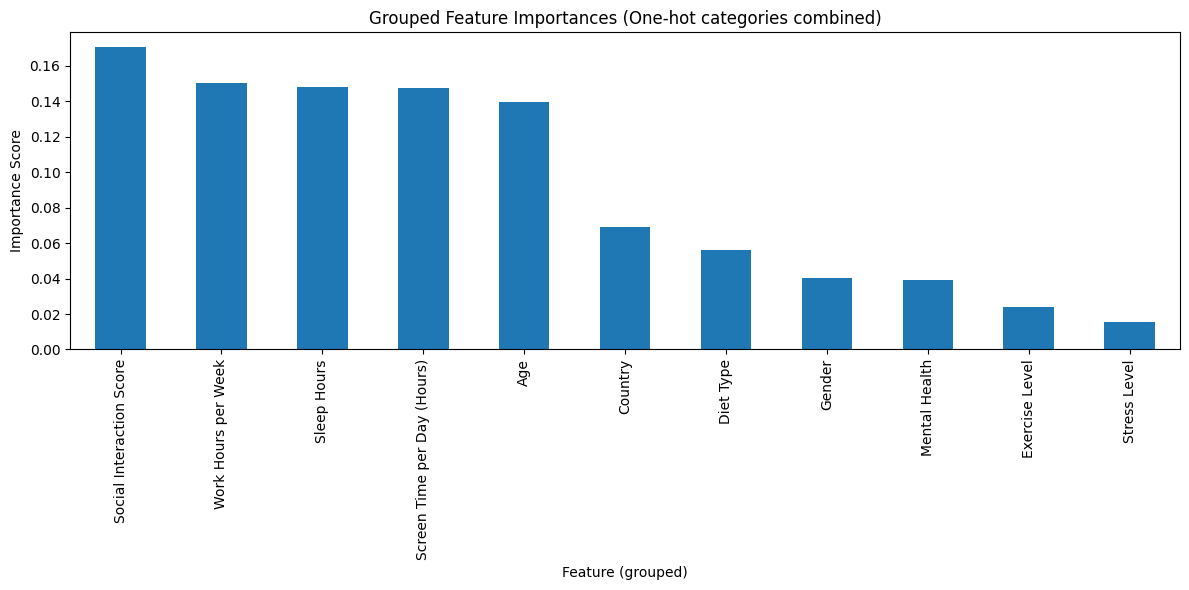

In [ ]:
# 예시: 'Diet Type_' 로 시작하는 열들의 중요도 합치기
category_groups = {
    "Diet Type": [col for col in X_train.columns if col.startswith("Diet Type_")],
    "Country": [col for col in X_train.columns if col.startswith("Country_")],
    "Gender": [col for col in X_train.columns if col.startswith("Gender_")],
    "Mental Health": [col for col in X_train.columns if col.startswith("Mental Health Condition_")],
}

# 원래 중요도
importances = pd.Series(models["Gradient Boosting"].feature_importances_, index=X_train.columns)

# 새로 합산한 중요도
grouped_importances = {}

for group_name, cols in category_groups.items():
    grouped_importances[group_name] = importances[cols].sum()

# 수치형 및 단일 열 feature도 추가
for col in importances.index:
    if not any(col in v for v in category_groups.values()):
        grouped_importances[col] = importances[col]

# 정렬 및 시각화
grouped_series = pd.Series(grouped_importances).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
grouped_series.plot(kind='bar')
plt.title("Grouped Feature Importances (One-hot categories combined)")
plt.ylabel("Importance Score")
plt.xlabel("Feature (grouped)")
plt.tight_layout()
plt.show()
